In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
net= pd.read_csv('netflix.csv')

In [6]:
net

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018
...,...,...,...,...,...,...,...
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014


In [7]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


In [8]:
net.premiere=net['premiere'].astype('datetime64[ns]')

In [9]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       583 non-null    object        
 1   genre       583 non-null    object        
 2   language    583 non-null    object        
 3   imdb_score  583 non-null    float64       
 4   premiere    583 non-null    datetime64[ns]
 5   runtime     583 non-null    int64         
 6   year        583 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 32.0+ KB


In [10]:
net.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,2018-06-24,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
3,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018


In [11]:
net.index=net['premiere']

In [12]:
net.drop(columns='premiere',inplace=True)

what are the most 5 genres rating in 2021

<Axes: xlabel='genre'>

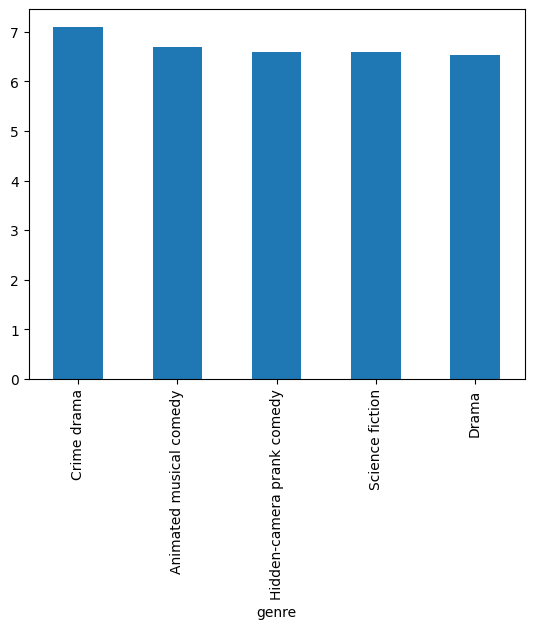

In [13]:
net2021=net[net['year']==2021]
net2021.groupby(net2021['genre']).mean(numeric_only=True)['imdb_score'].nlargest(5).plot.bar()

what is the most common laguages for these genres of films

<Axes: xlabel='language'>

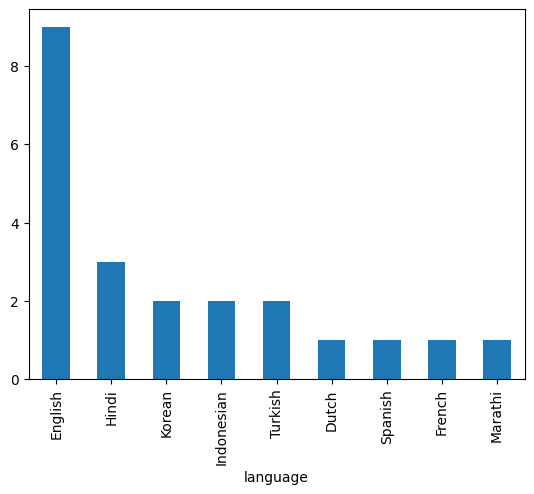

In [34]:
net2021large=net2021[net2021['genre'].isin(['Crime drama','Animated musical comedy','Hidden-camera prank comedy','Science fiction','Drama'])]
net2021large['language'].value_counts().plot.bar()

what is the mean runtime for each language

In [15]:
top_net2021=net2021[net2021['genre'].isin(['Crime drama','Animated musical comedy','Hidden-camera prank comedy','Science fiction','Drama'])]

<Axes: xlabel='language'>

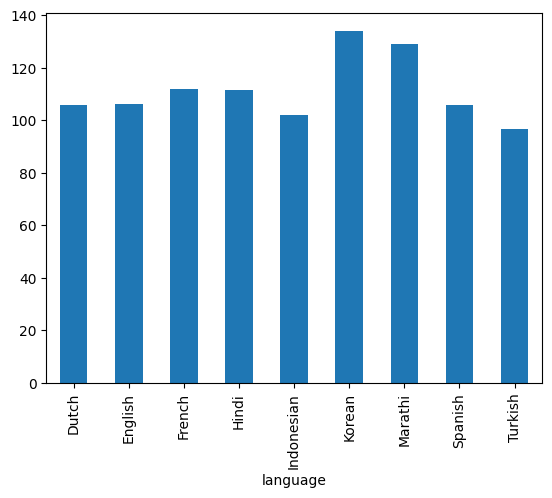

In [16]:
top_net2021.groupby('language').mean(numeric_only=True)['runtime'].plot.bar()

In [17]:
net

,title,genre,language,imdb_score,runtime,year
premiere,,,,,,
2020-11-24,Notes for My Son,Drama,Spanish,6.3,83,2020
2018-06-24,"To Each, Her Own",Romantic comedy,French,5.3,95,2018
2020-05-22,The Lovebirds,Romantic comedy,English,6.1,87,2020
2019-05-24,The Perfection,Horror-thriller,English,6.1,90,2019
2018-03-30,Happy Anniversary,Romantic comedy,English,5.8,78,2018
...,...,...,...,...,...,...
2019-06-12,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,144,2019
2020-09-02,Freaks: You're One of Us,Supernatural drama,German,5.4,92,2020
2021-02-11,Squared Love,Romantic comedy,Polish,5.0,102,2021


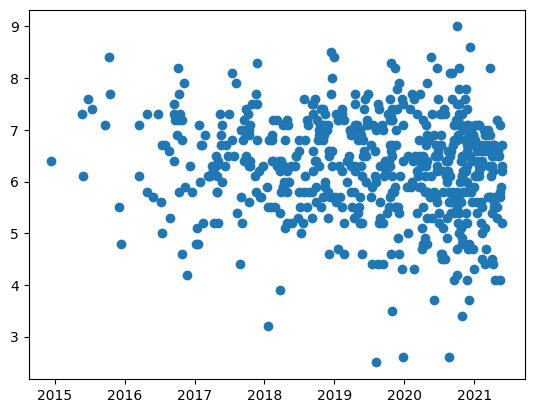

In [18]:
plt.scatter(net.index,net['imdb_score'])

what are the least genre films in 2021

In [21]:
net_least2021=net.loc['2021']
net_least2021

,title,genre,language,imdb_score,runtime,year
premiere,,,,,,
2021-04-14,Why Did You Kill Me?,Documentary,English,5.6,83,2021
2021-01-07,Pieces of a Woman,Drama,English,7.1,126,2021
2021-02-26,Crazy About Her,Romantic comedy,Spanish,6.6,102,2021
2021-04-09,Night in Paradise,Drama,Korean,6.7,132,2021
2021-05-14,I Am All Girls,Thriller,English,5.8,107,2021
...,...,...,...,...,...,...
2021-01-29,Finding 'Ohana,Family,English,6.1,123,2021
2021-03-12,Yes Day,Comedy,English,5.7,86,2021
2021-04-09,Thunder Force,Superhero-Comedy,English,4.4,105,2021


<Axes: xlabel='genre'>

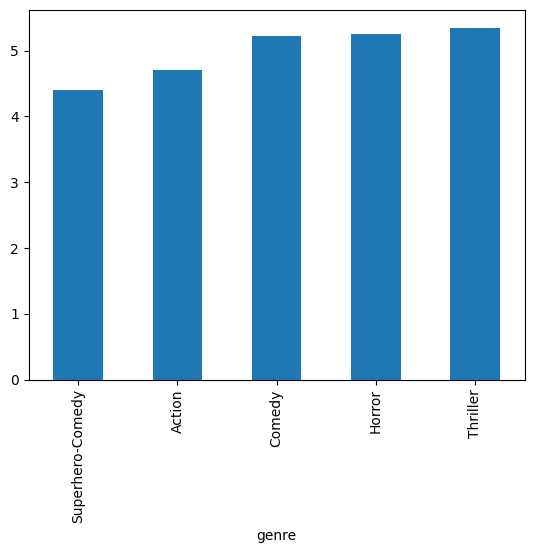

In [24]:
net_least2021.groupby('genre').mean(numeric_only=True)['imdb_score'].nsmallest(5).plot.bar()

what are the languages of these films

In [26]:
nn=net_least2021.groupby('genre').mean(numeric_only=True)['imdb_score'].nsmallest(5)

In [27]:
nn.index

Index(['Superhero-Comedy', 'Action', 'Comedy', 'Horror', 'Thriller'], dtype='object', name='genre')

<Axes: xlabel='language'>

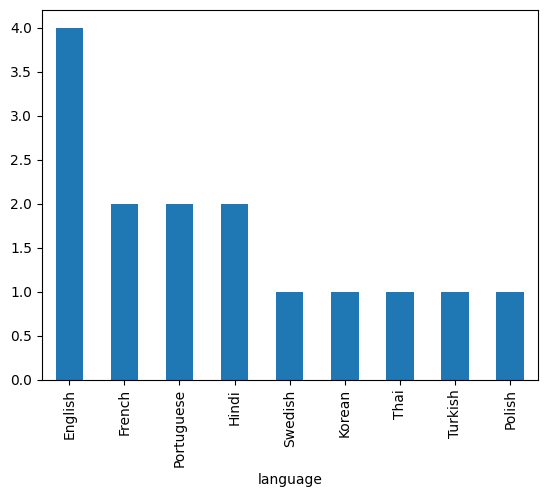

In [29]:
net_least2021[net_least2021['genre'].isin(nn.index)]['language'].value_counts().plot.bar()

plot runtime vs rating

In [30]:
net2021['runtimescaled']=(net2021['runtime']-net2021['runtime'].mean())/net2021['runtime'].std()

C:\Users\HP\AppData\Local\Temp\ipykernel_24312\2305072216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net2021['runtimescaled']=(net2021['runtime']-net2021['runtime'].mean())/net2021['runtime'].std()


In [31]:
net2021

,title,genre,language,imdb_score,runtime,year,runtimescaled
premiere,,,,,,,
2021-04-14,Why Did You Kill Me?,Documentary,English,5.6,83,2021,-0.830045
2021-01-07,Pieces of a Woman,Drama,English,7.1,126,2021,1.088295
2021-02-26,Crazy About Her,Romantic comedy,Spanish,6.6,102,2021,0.017594
2021-04-09,Night in Paradise,Drama,Korean,6.7,132,2021,1.355970
2021-05-14,I Am All Girls,Thriller,English,5.8,107,2021,0.240656
...,...,...,...,...,...,...,...
2021-01-29,Finding 'Ohana,Family,English,6.1,123,2021,0.954457
2021-03-12,Yes Day,Comedy,English,5.7,86,2021,-0.696207
2021-04-09,Thunder Force,Superhero-Comedy,English,4.4,105,2021,0.151431


In [32]:
net2021['imdb_scorescaled']=(net2021['imdb_score']-net2021['imdb_score'].mean())/net2021['imdb_score'].std()

C:\Users\HP\AppData\Local\Temp\ipykernel_24312\1431827666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net2021['imdb_scorescaled']=(net2021['imdb_score']-net2021['imdb_score'].mean())/net2021['imdb_score'].std()


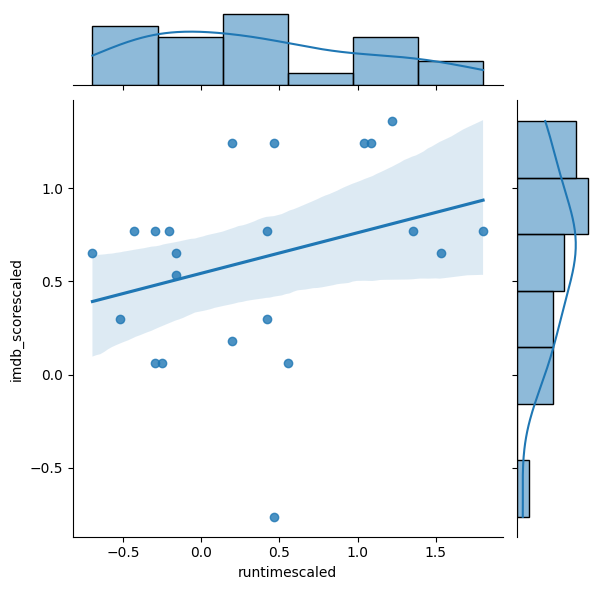

In [40]:
sns.jointplot(x='runtimescaled',y='imdb_scorescaled',data=net2021large,kind='reg')